# Imports & Functions

## Imports

In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

from IPython.display import display, Markdown

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

## Functions

In [4]:
# Function to show the dimensions, column zero counts, column datatypes, column null counts, and the first and last 5 rows of the input dataframe
def check_df(df):
    # Display the dimensions of the DataFrame
    display(Markdown("#### DataFrame Dimensions"))
    display(df.shape)

    # Add a new line
    display(Markdown("<br>"))

    # Display data types of all columns
    display(Markdown("#### Data Types, Zeros and Nulls"))
    display(pd.DataFrame({
        "Data Type": raw_df.dtypes,
        "Zero Counts": (raw_df == 0).sum(),
        "Null Counts": raw_df.isnull().sum()
    }))

    # Add a new line
    display(Markdown("<br>"))

    # Display the first 5 rows of the DataFrame
    display(Markdown("#### First 10 Rows"))
    display(df.head(5))

    # Add a new line
    display(Markdown("<br>"))

    # Display the last 5 rows of the DataFrame
    display(Markdown("#### Last 10 Rows"))
    display(df.tail(5))

def column_unique_values (df,column):
    display(Markdown( f"#### {column} values"))
    value_counts = df[column].value_counts()
    percentages = round(value_counts / len(df[column]),3) *100
    summary_df = pd.DataFrame({
            'Unique Value': value_counts.index,
            'Count': value_counts.values,
            'Percentage': percentages.values
    })
    return summary_df


def column_describe_values (df,column):
    column_min = round(df[[column]].min(),2)
    column_max = round(df[[column]].max(),2)
    column_mean = round(df[[column]].mean(),2)
    column_range = round(df[[column]].max() - df[[column]].min(),2)
    df_col_desc = pd.DataFrame({
            'minimum': column_min,
            'maximum': column_max,
            'range':column_range,
            'mean':column_mean
    })
    return df_col_desc


# Displaying the confusion matrix and the 4 key metrics which we measured the model
def get_results(actual, predicted):
    
    cf_matrix=confusion_matrix(actual, predicted)
    ax= plt.subplot()
    sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax, cmap = 'Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);
    
    print(f'The accuracy of your model is: {round(accuracy_score(actual, predicted),3)}')
    print(f'The recall of your model is: {round(recall_score(actual, predicted),3)}')
    print(f'The precision of your model is: {round(precision_score(actual, predicted),3)}')
    print(f'The F1-score of your model is: {round(f1_score(actual, predicted),3)}\n')

# Loading Data & EDA

In [6]:
# Creating dataframe from raw data
raw_df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

### Overview of DataFrame values

In [76]:
# Function to show the dimensions, column zero counts, column datatypes, column null counts, and the first and last 5 rows of the input dataframe
check_df(raw_df)

#### DataFrame Dimensions

(6362620, 11)

<br>

#### Data Types, Zeros and Nulls

,Data Type,Zero Counts,Null Counts
step,int64,0,0
type,object,0,0
amount,float64,16,0
nameOrig,object,0,0
oldbalanceOrg,float64,2102449,0
newbalanceOrig,float64,3609566,0
nameDest,object,0,0
oldbalanceDest,float64,2704388,0
newbalanceDest,float64,2439433,0
isFraud,int64,6354407,0


<br>

#### First 10 Rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<br>

#### Last 10 Rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Metadata
From: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data

- **step:** represents a unit of time where 1 step equals 1 hour
  
- **type:** type of online transaction
  
- **amount:** the amount of the transaction
  
- **nameOrig:** customer starting the transaction
  
- **oldbalanceOrg:** balance before the transaction
  
- **newbalanceOrig:** balance after the transaction
  
- **nameDest:** recipient of the transaction
  
- **oldbalanceDest:** initial balance of recipient before the transactions
  
- **newbalanceDest:** the new balance of recipient after the transaction
  
- **isFraud:** fraudulent transaction (1 = Fraud)

- **isFlaggedFraud:** baseline flagged fraudulent transaction

### isFlaggedFraud & isFraud

In [65]:
# Split of transactions flagged as Fraudulent (unique value = 1) and flagged as genuine (unique value = 0)
column_unique_values(raw_df,'isFlaggedFraud')

#### isFlaggedFraud values

,Unique Value,Count,Percentage
0,0,6362604,100.0
1,1,16,0.0


In [30]:
# View of all transaction flagged as fraudulent
raw_df.loc[raw_df['isFlaggedFraud']==1].sort_values(by = 'amount', ascending = False)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

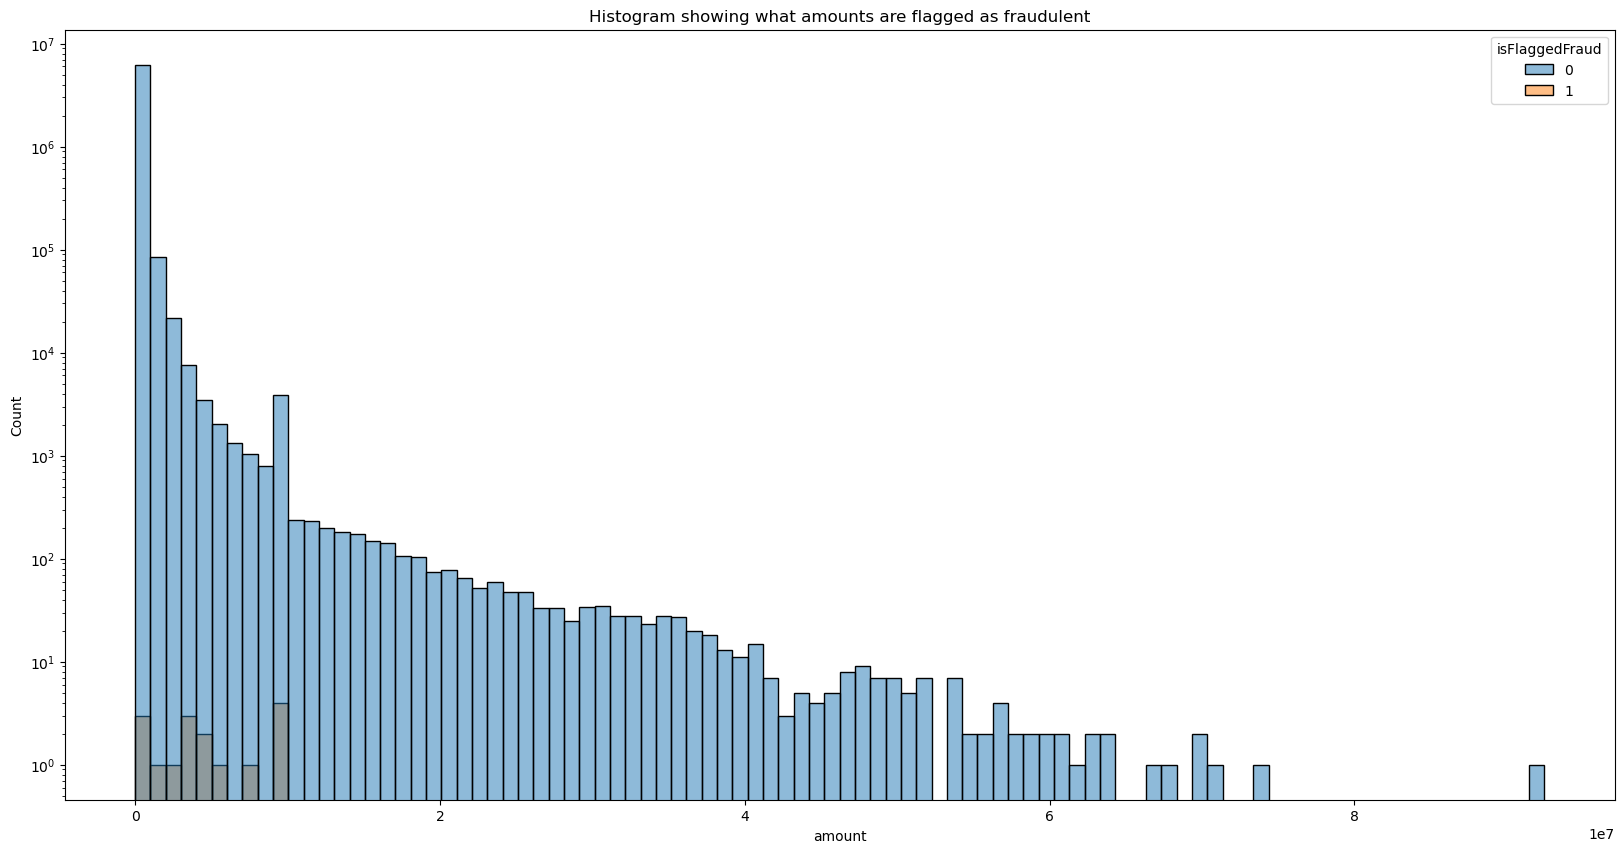

In [167]:
# Plotting a histogram to show the relationship of the flagged fraudulent transactions to the amount transferred
plt.figure(figsize=(20,10))
plt.title("Histogram showing what amounts are flagged as fraudulent")
sns.histplot(raw_df,x = 'amount', hue='isFlaggedFraud',binwidth = 1000000)
plt.yscale('log')
plt.show

In [67]:
# Split of actual Fraudulent (unique value = 1) and Genuine transactions (unique value = 0)
column_unique_values(raw_df,'isFraud')

#### isFraud values

,Unique Value,Count,Percentage
0,0,6354407,99.9
1,1,8213,0.1


<function matplotlib.pyplot.show(close=None, block=None)>

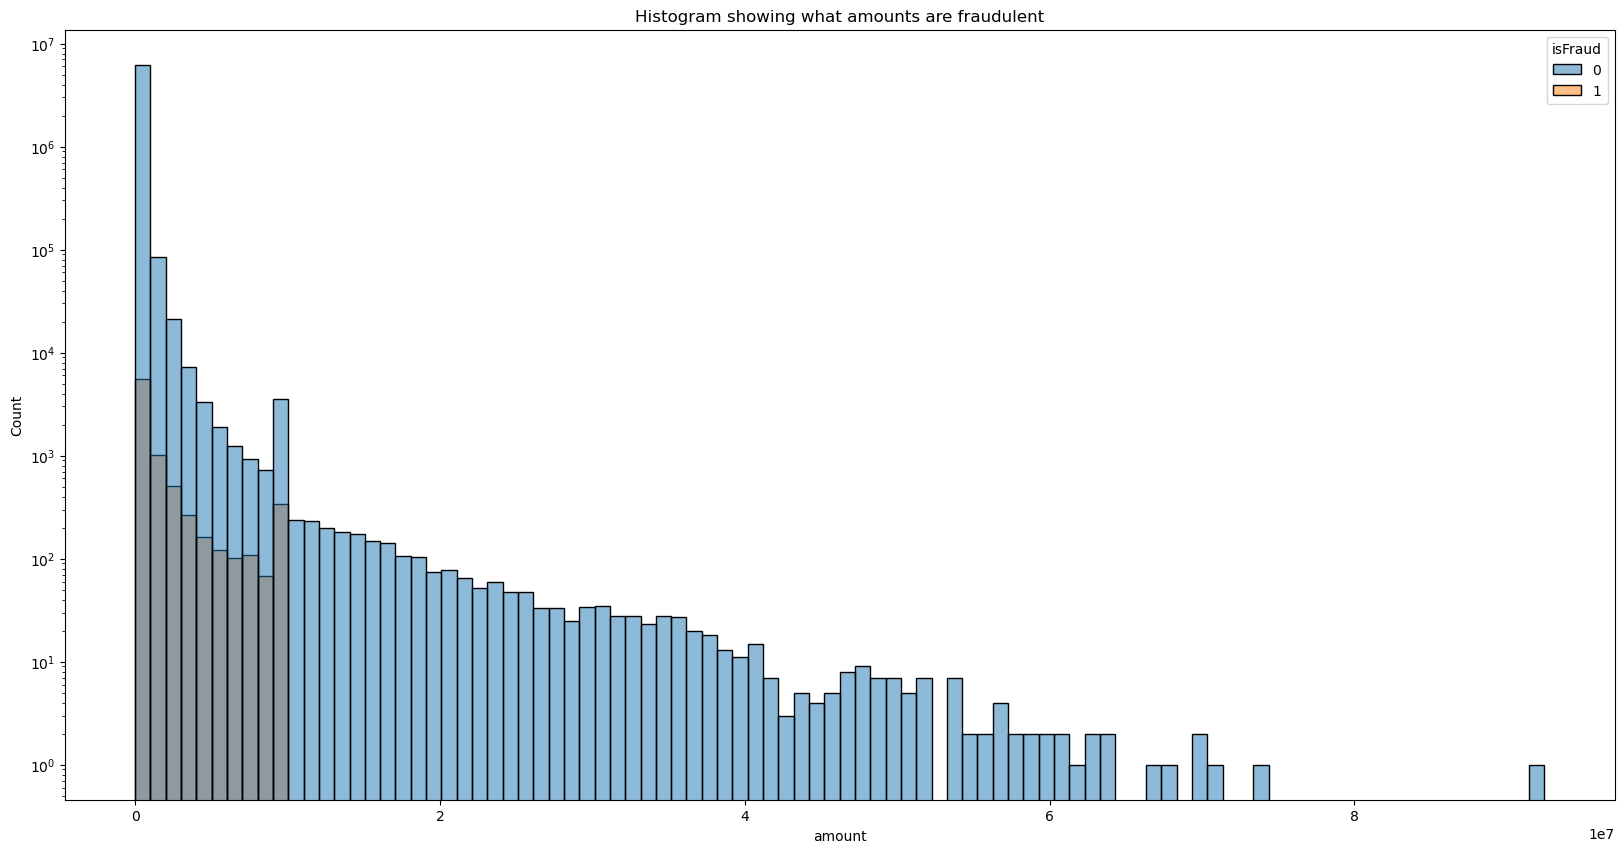

In [168]:
# Plotting a histogram to show the relationship of the flagged fraudulent transactions to the amount transferred
plt.figure(figsize=(20,10))
plt.title("Histogram showing what amounts are fraudulent")
sns.histplot(raw_df,x = 'amount', hue='isFraud',binwidth = 1000000)
plt.yscale('log')
plt.show

### Transaction types

In [69]:
# Breakdown of unique transaction types
column_unique_values(raw_df,'type')

#### type values

,Unique Value,Count,Percentage
0,CASH_OUT,2237500,35.2
1,PAYMENT,2151495,33.8
2,CASH_IN,1399284,22.0
3,TRANSFER,532909,8.4
4,DEBIT,41432,0.7


### Customer ID's

In [25]:
# View of the unique customer ID's
raw_df[['nameOrig','nameDest']].describe()

,nameOrig,nameDest
count,6362620,6362620
unique,6353307,2722362
top,C1902386530,C1286084959
freq,3,113


### Timesteps

In [65]:
# Table of hourly timestep distribution

step_min = round(raw_df[['step']].min(),2)
step_max = round(raw_df[['step']].max(),2)
step_days = round(step_max/24,2)

step_values_df = pd.DataFrame({
                'minimum': step_min,
                'maximum': step_max,
                'days equivalent':step_days,
})

step_values_df

,minimum,maximum,days equivalent
step,1,743,30.96


<Axes: title={'center': 'Histogram show the number of transaction daily'}, xlabel='step', ylabel='Count'>

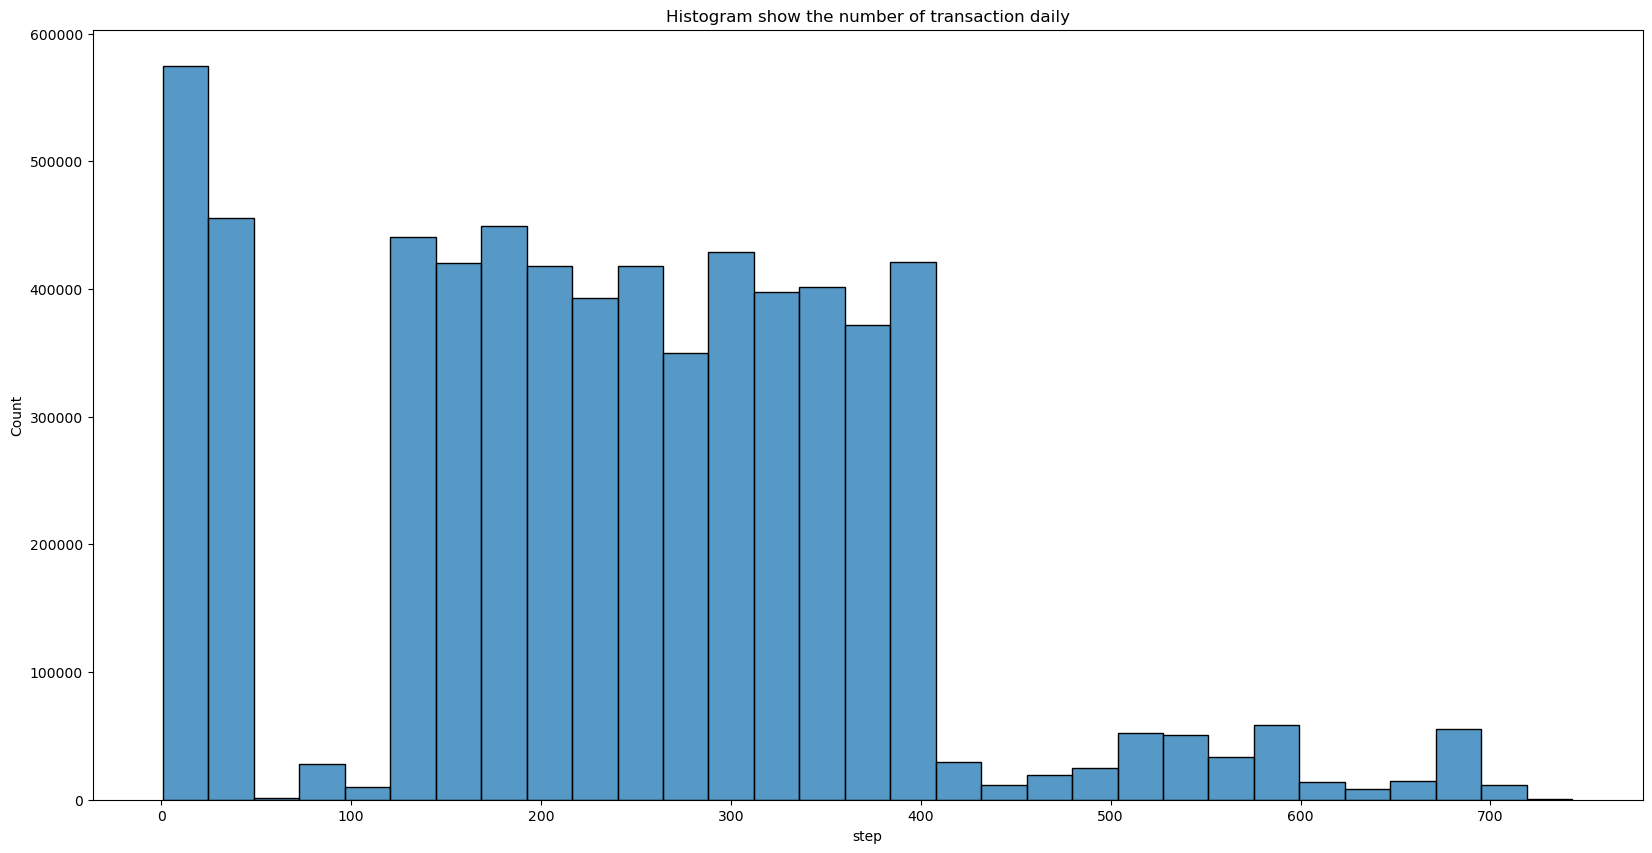

In [122]:
# Histogram of the number of transactions in daily timesteps over the whole time period
plt.figure(figsize=(20,10))
plt.title("Histogram show the number of transaction daily")
sns.histplot(raw_df['step'],binwidth=24)

# Feature Engineering

In [106]:
# Defining features to include in model and for further feature engineering
features = ['amount',
            'oldbalanceOrg',
            'newbalanceOrig',
            'oldbalanceDest',
            'newbalanceDest',
            'isFraud']

# Creating a new feature engineered dataframe with required features
fe_df = raw_df[features].copy()

In [108]:
# Adding columns the fe_df which calculate the differences in balances for the origin accounts and the destination accounts in each transaction
fe_df['changebalanceOrg'] = fe_df['oldbalanceOrg'] - fe_df['newbalanceOrig']
fe_df['changebalanceDest'] = fe_df['oldbalanceDest'] - fe_df['newbalanceDest']

In [110]:
# Applying one hot encoding to the transaction types, and adding them to the fe_df
type_one_hot = pd.get_dummies(raw_df['type'], dtype=int)
fe_df = pd.concat([fe_df, type_one_hot], axis=1)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,changebalanceOrg,changebalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,-339682.13,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,-6311409.27,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00,0,0,0,0,1


In [ ]:
# Checking the table has been feature engineered as intended
fe_df

# Train/Test Splitting

In [156]:
# Extract the target column
y = fe_df[['isFraud']]

# Drop the target column from the DataFrame
X = fe_df.drop(columns=['isFraud'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Isolation Forest Model

In [158]:
# Declaring the isolation forest model
if_model = IsolationForest(random_state=0)

# Fitting the isolation forest model with the feature training data
if_model.fit(X_train)

IsolationForest(random_state=0)

# Results

In [160]:
# Generating anomaly scores and predictions based on training data
y_train['anomaly scores']=if_model.decision_function(X_train)
y_train['anomaly flag']=if_model.predict(X_train)

# Generating anomaly scores and predictions based on test data
y_test['anomaly scores']=if_model.decision_function(X_test)
y_test['anomaly flag']=if_model.predict(X_test)

# Reformating prediction output to align with 0 = genuine & 1 = anomalous
y_train['anomaly flag'] = y_train['anomaly flag'].replace(1, 0)
y_train['anomaly flag'] = y_train['anomaly flag'].replace(-1, 1)

y_test['anomaly flag'] = y_test['anomaly flag'].replace(1, 0)
y_test['anomaly flag'] = y_test['anomaly flag'].replace(-1, 1)


The accuracy of your model is: 0.881
The recall of your model is: 0.587
The precision of your model is: 0.006
The F1-score of your model is: 0.013



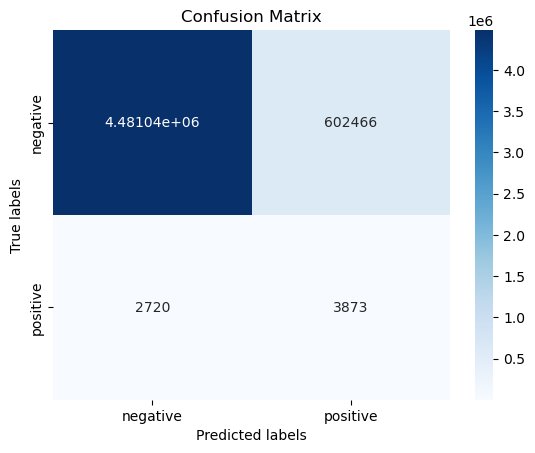

In [161]:
# Results from the train data predictions
get_results(y_train['isFraud'],y_train['anomaly flag'])

The accuracy of your model is: 0.881
The recall of your model is: 0.581
The precision of your model is: 0.006
The F1-score of your model is: 0.012



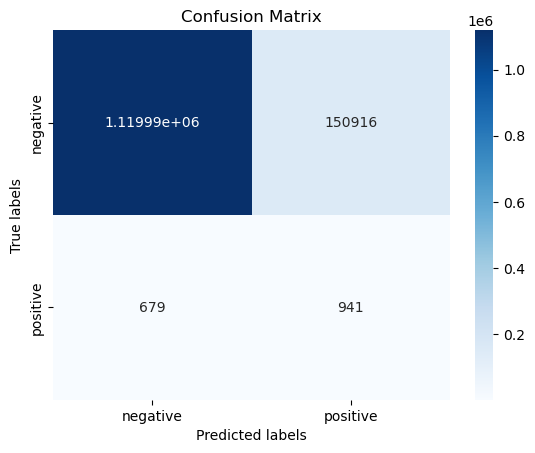

In [162]:
# Results from the test data predictions
get_results(y_test['isFraud'],y_test['anomaly flag'])